In [8]:
# Dependencies for this notebook
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Ignore warning for this project
import warnings
warnings.filterwarnings("ignore")

import os
import joblib

In [9]:
# Load the dataset
df = pd.read_csv("data/input.csv", sep=";")
df.head()

,qm_spec_id,Line 1,Line 2,Line 3,Density_Target,Dry_Feed_Rate_PID.OUT,Dry_Feed_Rate_PID.SP
0,200,0,0,1,440,0,7000
1,37,0,1,0,528,24,6000
2,503,0,1,0,384,24,6000
3,509,0,1,0,456,24,6000
4,558,0,1,0,456,24,6000


In [10]:
validation = df["Dry_Feed_Rate_PID.OUT"]
input = df[["Density_Target", "Dry_Feed_Rate_PID.SP", "Line 1", "Line 2","Line 3"]]

input.head()



,Density_Target,Dry_Feed_Rate_PID.SP,Line 1,Line 2,Line 3
0,440,7000,0,0,1
1,528,6000,0,1,0
2,384,6000,0,1,0
3,456,6000,0,1,0
4,456,6000,0,1,0


In [11]:
scaler = joblib.load("out/scaler.pkl")
model = joblib.load("out/trained_model.pkl")

scaled_input = scaler.transform(input)
predictions = model.predict(scaled_input)

output = pd.DataFrame({ 
	"qm_spec_id":  df["qm_spec_id"], 
	"Line 1":  df["Line 1"], 
	"Line 2":  df["Line 2"], 
	"Line 3":  df["Line 3"], 
	"Density_Target":  df["Density_Target"], 
	"Dry_Feed_Rate_PID.SP": df["Dry_Feed_Rate_PID.SP"],
	"Prediction.OUT": predictions, 
	"Validation.OUT": validation 
})

output.head()

,qm_spec_id,Line 1,Line 2,Line 3,Density_Target,Dry_Feed_Rate_PID.SP,Prediction.OUT,Validation.OUT
0,200,0,0,1,440,7000,51.007975,0
1,37,0,1,0,528,6000,19.424968,24
2,503,0,1,0,384,6000,23.748271,24
3,509,0,1,0,456,6000,21.586650,24
4,558,0,1,0,456,6000,21.586650,24


In [12]:
output.to_csv("out/predictions.csv", index=False, sep=";", decimal=",")

<Axes: xlabel='Prediction.OUT', ylabel='Validation.OUT'>

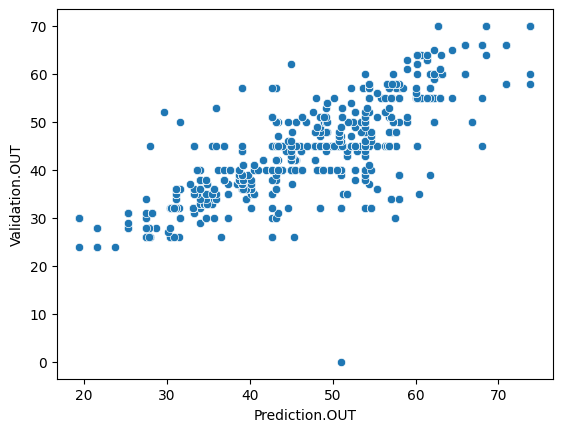

In [13]:
sns.scatterplot(output, x="Prediction.OUT", y="Validation.OUT")